**Importing the libraries**

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import catboost as cbc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer

**Reading the data**

In [237]:
train_data = pd.read_csv("Train_Data.csv")
train_data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


**Converting specific ailments into category type**

In [238]:
train_data["Specific ailments"] = train_data["Specific ailments"].astype("category")

**Dropping the duplicate rows**

In [239]:
train_data.drop_duplicates(inplace=True)

**Encoding the Food Preference column**

In [240]:
arr = np.array(train_data['Food preference'].values)
arr.reshape(-1)

new_arr = [x.strip().split(' ') if pd.notna(x) else [] for x in arr]

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(new_arr)
encoded_df = pd.DataFrame(encoded_data, columns=mlb.classes_)

train_data = pd.concat([train_data,encoded_df],axis=1)

train_data.drop(columns=['Food preference'],axis =1 , inplace = True)
train_data

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,...,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,2408,44,2668,49,20.500470,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,1
1,25063,39,10363,20,26.076580,NO,URBAN,Stable,0.0,0.0,...,0.0,0.0,1.0,1,0,0,1,1,0,0
2,26798,29,132,1,21.420866,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,31907,27,10499,30,25.203247,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,26412,9,7963,40,19.355846,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,58,25.515286,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,1
25916,21001,39,11500,16,27.094959,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
25917,4263,44,2796,8,28.602921,NO,RURAL,Stable,1.0,1.0,...,0.0,0.0,2.0,1,1,0,0,0,0,0
25918,11208,52,12190,52,21.909832,NO,RURAL,Stable,0.0,1.0,...,0.0,0.0,2.0,1,1,0,0,0,0,0


In [241]:
sum = train_data[["DX1","DX2","DX3","DX4","DX5","DX6"]].sum(axis=1)

In [242]:
train_data[["DX1","DX2","DX3","DX4","DX5","DX6"]] = train_data[["DX1","DX2","DX3","DX4","DX5","DX6"]].div(sum, axis= 0)

In [243]:
train_data

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,...,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,2408,44,2668,49,20.500470,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,25063,39,10363,20,26.076580,NO,URBAN,Stable,0.0,0.0,...,0.0,0.0,1.0,1,0.0,0.0,0.5,0.5,0.0,0.0
2,26798,29,132,1,21.420866,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,31907,27,10499,30,25.203247,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,26412,9,7963,40,19.355846,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,58,25.515286,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0
25916,21001,39,11500,16,27.094959,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0
25917,4263,44,2796,8,28.602921,NO,RURAL,Stable,1.0,1.0,...,0.0,0.0,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0
25918,11208,52,12190,52,21.909832,NO,RURAL,Stable,0.0,1.0,...,0.0,0.0,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0


**Visualizing the data**

C:\Users\Parth Agarwal\AppData\Local\Temp\ipykernel_12124\1460146067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


<Axes: >

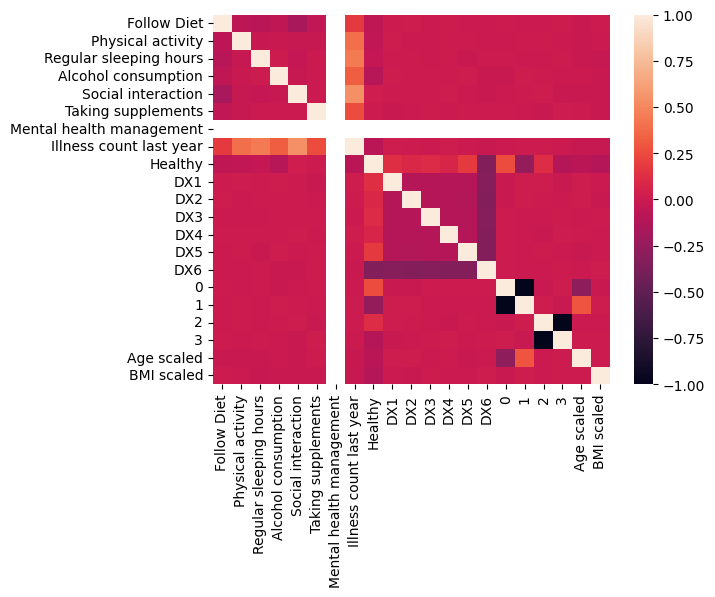

In [285]:
sns.heatmap(train_data.corr())

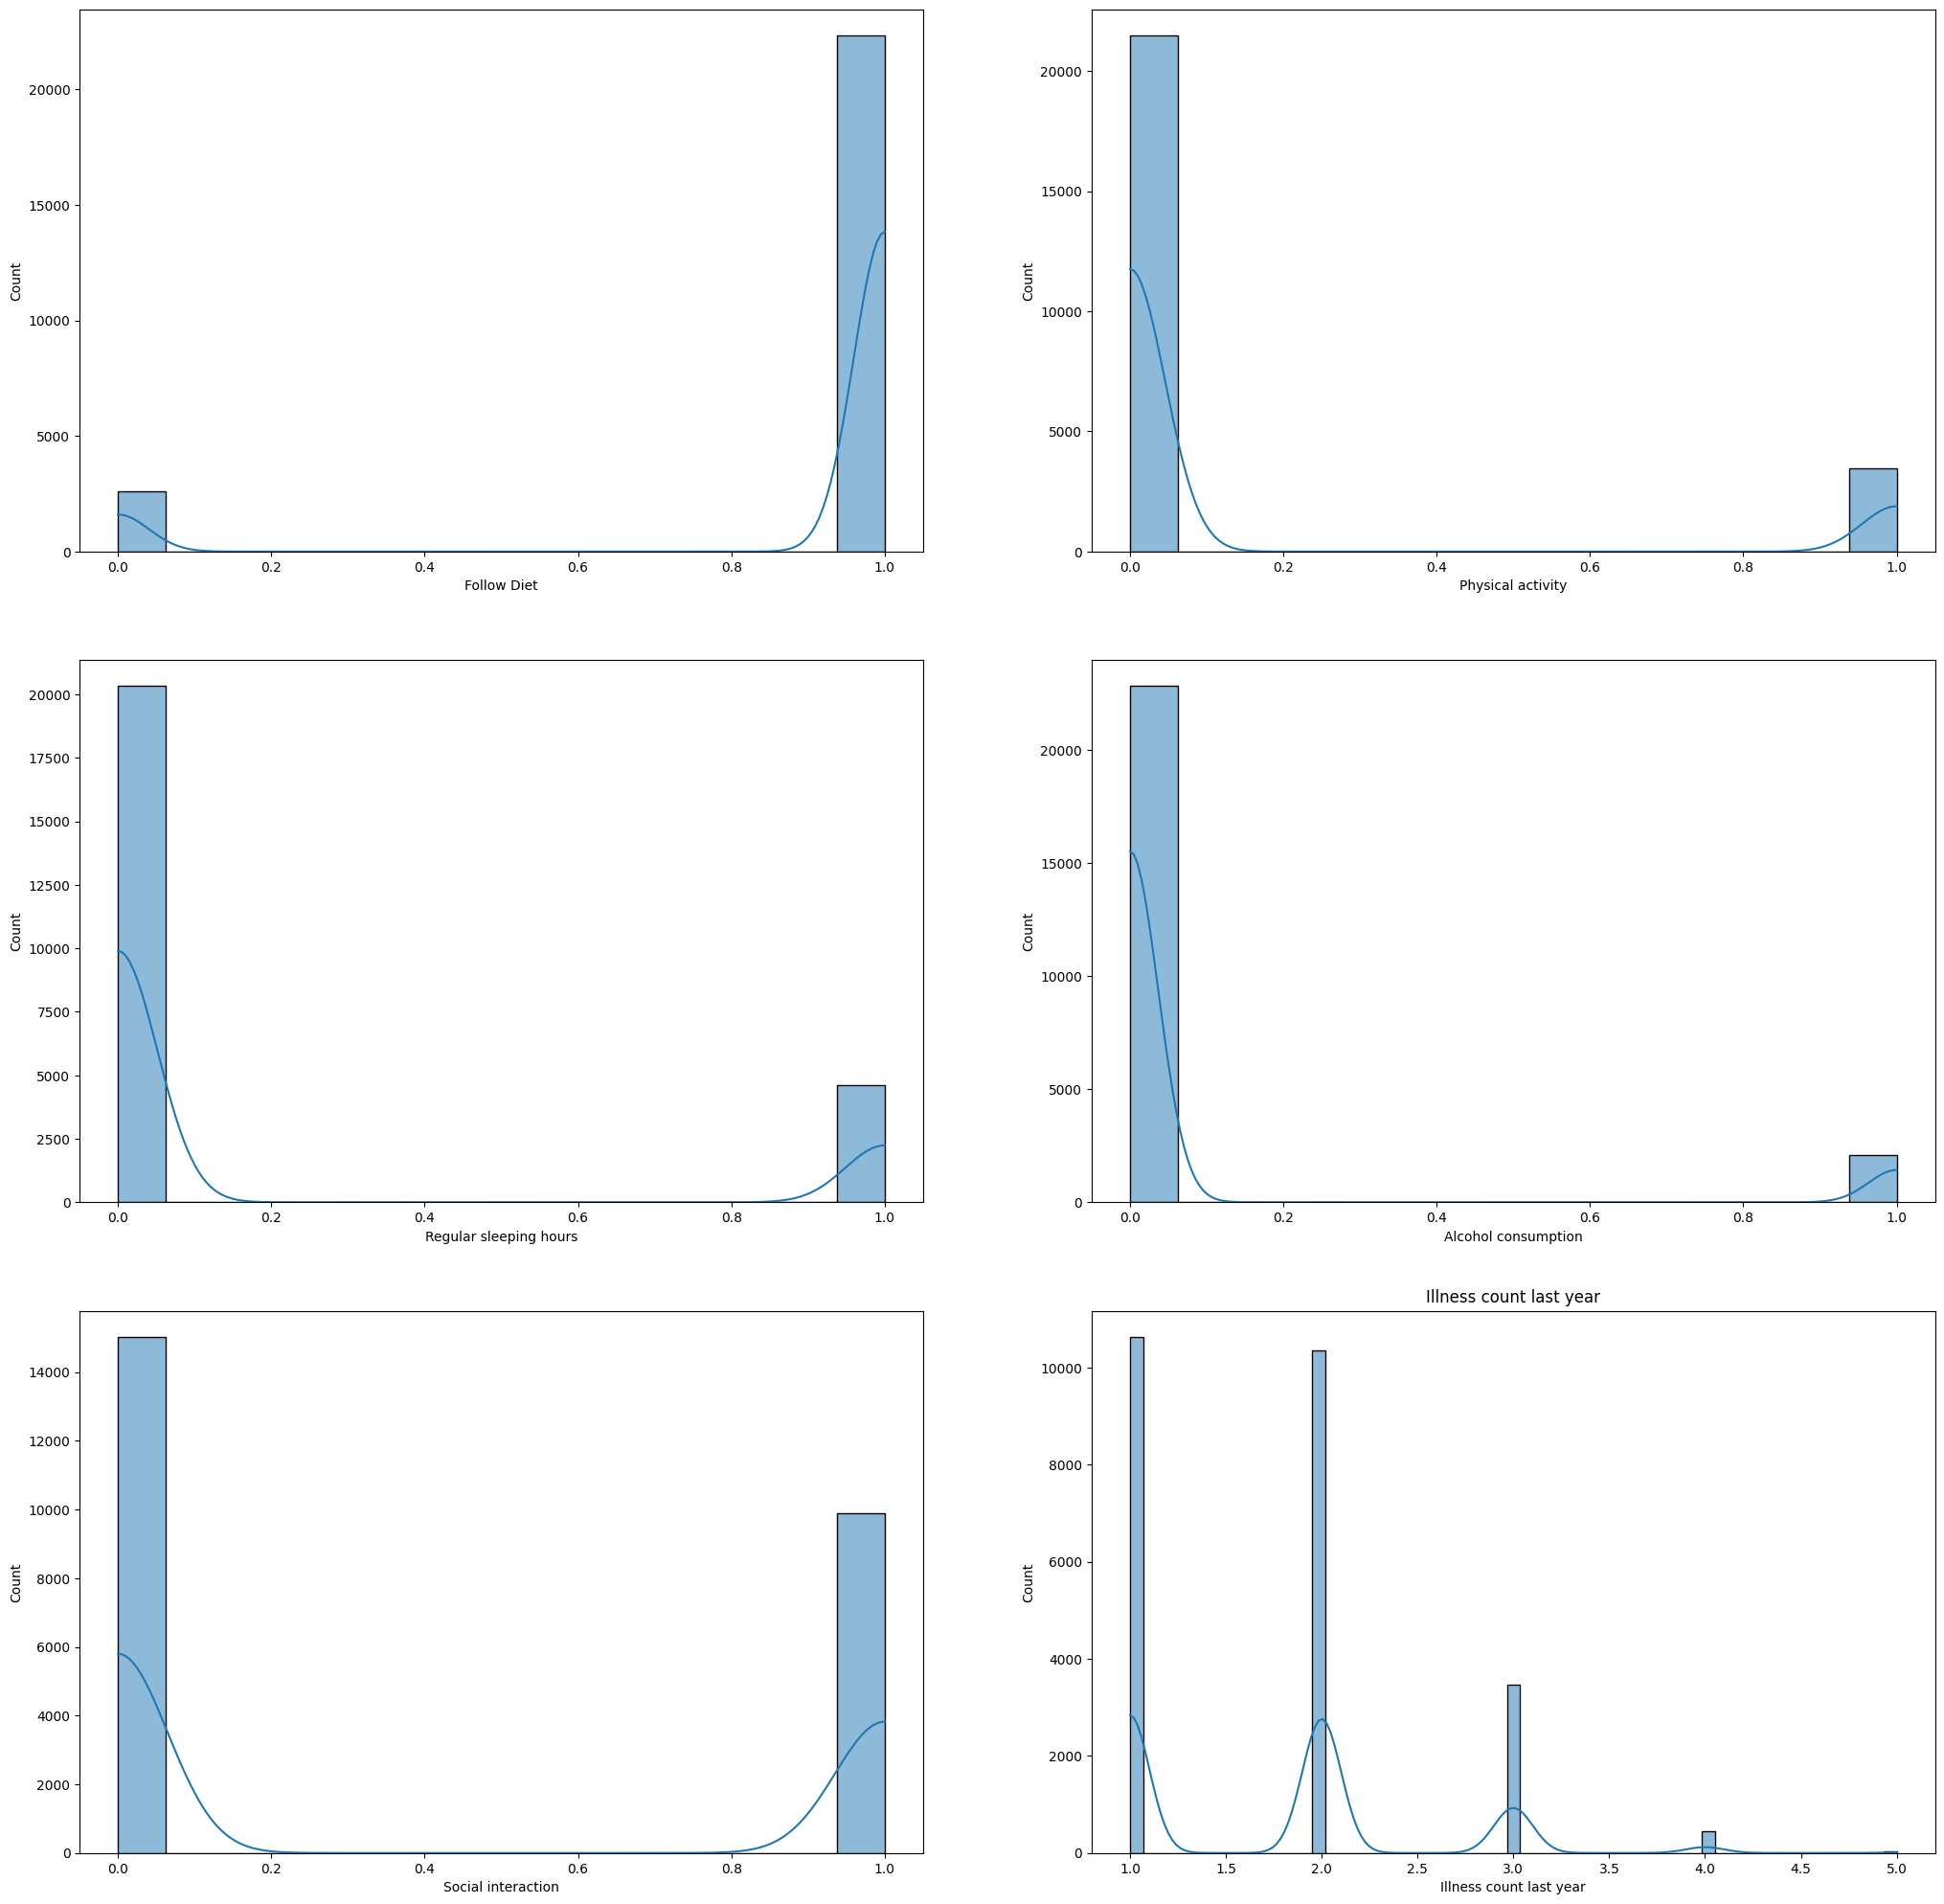

In [288]:
fig, axes = plt.subplots(3, 2, figsize=(25, 25))
count=0
df_train = train_data[['Follow Diet','Physical activity',
'Regular sleeping hours', 'Alcohol consumption', 'Social interaction',
'Illness count last year']]
for column in df_train:
    j = int(count/2)
    i = int(count % 2)
    count=count+1
    sns.histplot(df_train[column], kde=True, ax =axes[j,i])
    plt.title(column)

<Axes: xlabel='Healthy', ylabel='count'>

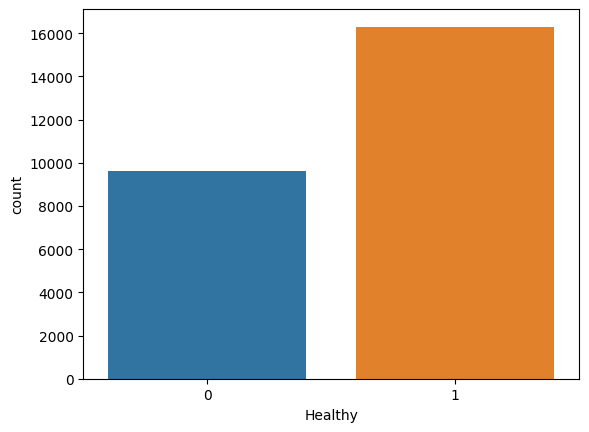

In [245]:
sns.countplot(x=train_data['Healthy'])

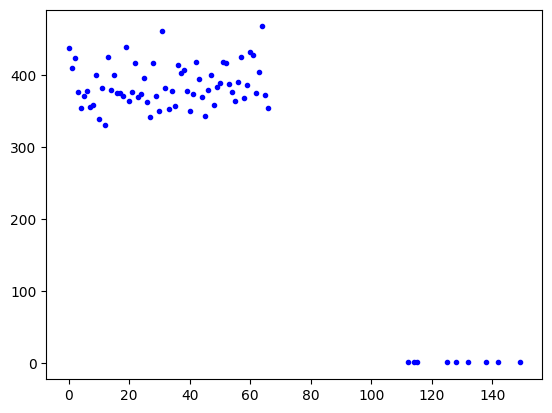

In [247]:
plt.plot(train_data["Age"].value_counts(), "b.")

**Dropping outliers**

In [248]:
value_counts = train_data["Age"].value_counts()  
to_keep = value_counts[value_counts >= 5].index  

train_data = train_data[train_data["Age"].isin(to_keep)]  

In [249]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25910 entries, 0 to 25919
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID1                        25910 non-null  int64   
 1   Specific ailments          25910 non-null  category
 2   ID2                        25910 non-null  int64   
 3   Age                        25910 non-null  int64   
 4   BMI                        25910 non-null  float64 
 5   Smoker?                    25910 non-null  object  
 6   Living in?                 25910 non-null  object  
 7   Any heriditary condition?  25910 non-null  object  
 8   Follow Diet                24937 non-null  float64 
 9   Physical activity          24937 non-null  float64 
 10  Regular sleeping hours     24937 non-null  float64 
 11  Alcohol consumption        24937 non-null  float64 
 12  Social interaction         24937 non-null  float64 
 13  Taking supplements         2493

**Dropping rows with nan values, entire rows are dropped as the ones with missing values have a lot of columns missing**

In [250]:
train_data = train_data[~train_data.isna().any(axis=1)]

**One Hot encoding**

In [251]:
encoder = OneHotEncoder()
enc_data = encoder.fit_transform(train_data[["Smoker?", "Living in?"]])
enc_data = pd.DataFrame(enc_data.toarray(), index = train_data.index)
train_data = train_data.join(enc_data)
train_data.drop(["Smoker?", "Living in?"], axis = 1, inplace = True)

**Scaling the data**

In [252]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[[ "Age", "BMI"]])
scaled_data = pd.DataFrame(scaled_data, index = train_data.index, columns= ["Age scaled", "BMI scaled"])
train_data = train_data.join(scaled_data)
train_data.drop(["Age", "BMI",], axis = 1, inplace= True)

In [253]:
train_data.drop(["Any heriditary condition?","ID1","ID2",], axis = 1, inplace = True)

**Splitting the target**

In [254]:
X_train_full = train_data.drop(["Healthy"], axis = 1)
y_train_full = train_data["Healthy"]

**Splitting the data into train and validation/dev set**

In [255]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, stratify= y_train_full, random_state= 40)

**Training a CatBoostClassifier**

In [256]:
param_grid = [{
    'learning_rate' : [0.1,0.2,0.3,0.4],
    'max_depth': [2,3,4,5],
    'reg_lambda' : [3,4,5,6]
}]
cbc = GridSearchCV(cbc.CatBoostClassifier(eval_metric="Accuracy", cat_features=["Specific ailments"],iterations=500, random_state= 40), param_grid, cv = 3)
cbc.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model= True, plot = False)

0:	learn: 0.7665419	test: 0.7718524	best: 0.7718524 (0)	total: 41.8ms	remaining: 20.8s
1:	learn: 0.7823820	test: 0.7846832	best: 0.7846832 (1)	total: 88.1ms	remaining: 21.9s
2:	learn: 0.8045716	test: 0.8011227	best: 0.8011227 (2)	total: 136ms	remaining: 22.6s
3:	learn: 0.8128592	test: 0.8087410	best: 0.8087410 (3)	total: 184ms	remaining: 22.9s
4:	learn: 0.8148643	test: 0.8107458	best: 0.8107458 (4)	total: 256ms	remaining: 25.3s


5:	learn: 0.8174041	test: 0.8159583	best: 0.8159583 (5)	total: 316ms	remaining: 26s
6:	learn: 0.8195428	test: 0.8175621	best: 0.8175621 (6)	total: 365ms	remaining: 25.7s
7:	learn: 0.8246224	test: 0.8175621	best: 0.8175621 (6)	total: 411ms	remaining: 25.3s
8:	learn: 0.8226841	test: 0.8247795	best: 0.8247795 (8)	total: 454ms	remaining: 24.8s
9:	learn: 0.8255581	test: 0.8163593	best: 0.8247795 (8)	total: 497ms	remaining: 24.3s
10:	learn: 0.8246892	test: 0.8179631	best: 0.8247795 (8)	total: 549ms	remaining: 24.4s
11:	learn: 0.8278305	test: 0.8223737	best: 0.8247795 (8)	total: 593ms	remaining: 24.1s
12:	learn: 0.8278305	test: 0.8191660	best: 0.8247795 (8)	total: 633ms	remaining: 23.7s
13:	learn: 0.8275632	test: 0.8203689	best: 0.8247795 (8)	total: 684ms	remaining: 23.7s
14:	learn: 0.8299024	test: 0.8203689	best: 0.8247795 (8)	total: 736ms	remaining: 23.8s
15:	learn: 0.8299693	test: 0.8239775	best: 0.8247795 (8)	total: 783ms	remaining: 23.7s
16:	learn: 0.8304371	test: 0.8199679	best: 0.82477

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000027012119D50>,
             param_grid=[{'learning_rate': [0.4], 'max_depth': [5],
                          'reg_lambda': [3]}])

**Preparing the test data**

In [272]:
test_data = pd.read_csv("Test_Data.csv")

In [273]:
test_data.drop(["ID1","ID2","Any heriditary condition?","Mental health management"],axis=1, inplace= True)

In [274]:
train_data["Specific ailments"] = train_data["Specific ailments"].astype("category")

In [275]:
arr = np.array(test_data['Food preference'].values)
arr.reshape(-1)

new_arr = [x.strip().split(' ') if pd.notna(x) else [] for x in arr]

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(new_arr)
encoded_df = pd.DataFrame(encoded_data, columns=mlb.classes_)

test_data = pd.concat([test_data,encoded_df],axis=1)

test_data.drop(columns=['Food preference'],axis =1 , inplace = True)

In [276]:
sum = test_data[["DX1","DX2","DX3","DX4","DX5","DX6"]].sum(axis=1)

In [277]:
test_data[["DX1","DX2","DX3","DX4","DX5","DX6"]] = test_data[["DX1","DX2","DX3","DX4","DX5","DX6"]].div(sum, axis= 0)

In [278]:
test_data["Smoker?"] = np.where(test_data["Smoker?"] == 'Cannot say','YES',test_data["Smoker?"])

In [279]:
enc_data = encoder.transform(test_data[["Smoker?", "Living in?"]])
enc_data = pd.DataFrame(enc_data.toarray(), index = test_data.index)
test_data = test_data.join(enc_data)
test_data.drop(["Smoker?", "Living in?"], axis = 1, inplace = True)

In [280]:
scaled_data = scaler.transform(test_data[[ "Age", "BMI"]])
scaled_data = pd.DataFrame(scaled_data, index = test_data.index, columns= ["Age scaled", "BMI scaled"])
test_data = test_data.join(scaled_data)
test_data.drop(["Age", "BMI"], axis = 1, inplace= True)

**Getting our predictions and converting them into a csv format**

In [281]:
pred = cbc.predict(test_data)

In [282]:
sample = pd.read_csv("Sample_Submission.csv")

In [283]:
result = pd.DataFrame(pred, columns=['predictions'])

In [284]:
result.to_csv("submission_healthy_cbc.csv")